# Experiment results

In [8]:
import yaml
import os
import numpy as np
import matplotlib.pyplot as plt

from src.lib import experimentation
from src.lib import plotting

with open(os.path.join("../config.yaml")) as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)
    
def load_hist(name):
    return np.load(os.path.join(cfg['experiment_directory'], f"{name}.npy"), allow_pickle=True).item()

In [9]:
os.listdir(cfg['experiment_directory'])

['test-experiment-2.npy', 'standard-scaling-test.npy', 'test-experiment-1.npy']

In [11]:
hist = load_hist("standard-scaling-test")
hist.keys()

dict_keys(['train_loss', 'val_loss', 'train_amex_metric', 'val_amex_metric', 'train_loss_mean', 'train_loss_sd', 'val_loss_mean', 'val_loss_sd', 'train_amex_metric_mean', 'train_amex_metric_sd', 'val_amex_metric_mean', 'val_amex_metric_sd', 'num_epochs', 'preprocess_times', 'train_times', 'experiment_name', 'experiment_config', 'cli_arguments', 'elapsed_time'])

In [14]:
def plot_cv(history, suffix, ax, cols = ['tab:blue', 'tab:orange'], **kwargs):
    train_mean = plotting.get_average(history, f"train_{suffix}")
    val_mean = plotting.get_average(history, f"val_{suffix}")
    
    for i in range(5):
        ax.plot(history[f"train_{suffix}"][i], alpha = 0.5,
                label = "Train" if i == 0 else None,
                color = cols[0],
                linestyle = 'dashed', **kwargs)
        ax.plot(history[f"val_{suffix}"][i], alpha = 0.5,
                label = "Val" if i == 0 else None,
                color = cols[1],
                linestyle = 'dashed', **kwargs)
        # add red dot if was terminates
        if len(history[f"train_{suffix}"][i]) < len(train_mean):
            ax.plot(len(history[f"train_{suffix}"][i]) - 1, history[f"train_{suffix}"][i][-1], color='red', marker='o', alpha=0.3)
            ax.plot(len(history[f"val_{suffix}"][i]) - 1, history[f"val_{suffix}"][i][-1], color='red', marker='o', alpha=0.3)
    
    ax.plot(train_mean, label="Train (CV mean)", color=cols[0], **kwargs)
    ax.plot(val_mean, label="Val (CV mean)", color=cols[1], **kwargs)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(suffix)
    ax.legend()

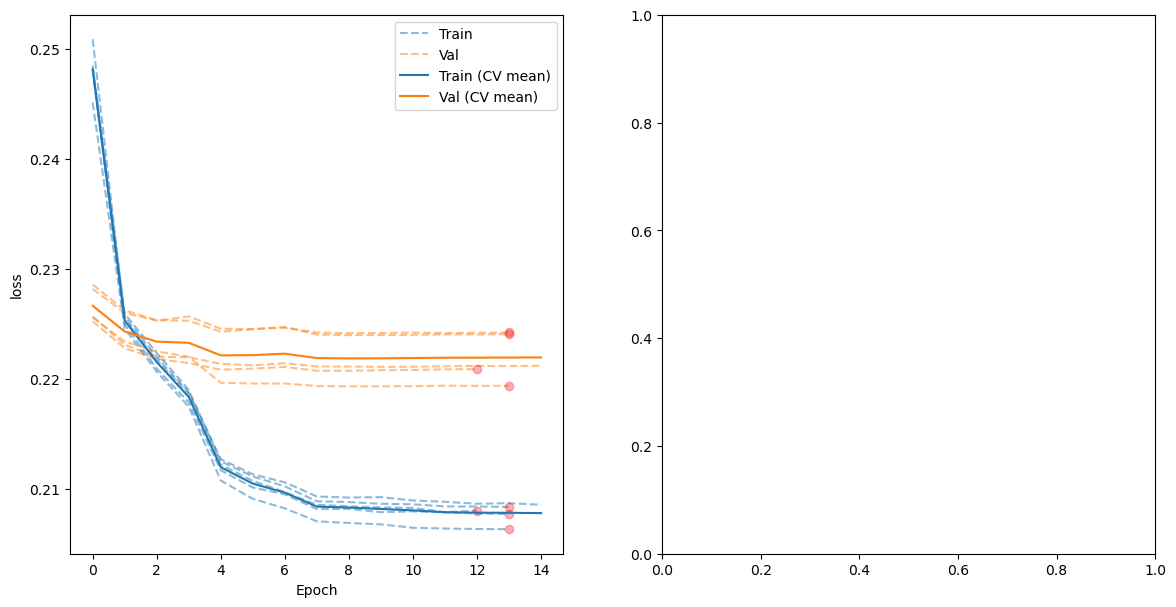

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 7))
plot_cv(hist, "loss", axs[0])